In [ ]:
import os
colab = 1

if colab == 1:
  from google.colab import drive
  drive.mount('/content/drive', force_remount = True)
  current_folder = 'Capstone'
  dest_folder = '/content/drive/My Drive/' + current_folder
  os.chdir(dest_folder)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def wOBACalc(file, playerName, pitchType, ubbFact = .738822, hbpFact = .765579, oneBFact = .92845, twoBFact = 1.34266, threeBFact = 1.71558, hrFact = 2.0296):

  bbFile = pd.read_csv(file)

  player = bbFile.loc[bbFile['Pitcher'] == playerName]

  if pitchType != 'None':
    
    player = player.loc[player['TaggedPitchType'] == pitchType]

  single = player.loc[player['PlayResult'] == 'Single']
  double = player.loc[player['PlayResult'] == 'Double']
  triple = player.loc[player['PlayResult'] == 'Triple']
  homerun = player.loc[player['PlayResult'] == 'HomeRun']
  hitbypitch = player.loc[player['PitchCall'] == 'HitByPitch']

  intentionalWalk = player.loc[player[ 'PitchCall'] == 'BallIntentional']
  unintentionalWalk = player.loc[player['KorBB'] == 'Walk']

  kbb = player.loc[player['KorBB'] != 'Undefined']
  play = player.loc[player['PlayResult'] != 'Undefined']


  sacrifice = player.loc[player['PlayResult'] == 'Sacrifice']

  sacrificefly = sacrifice.loc[sacrifice['TaggedHitType'] == 'FlyBall']
  sacrificehit = sacrifice.loc[sacrifice['TaggedHitType'] == 'Bunt']

  oneB = len(single)
  twoB = len(double)
  threeB = len(triple)
  hr = len(homerun)
  hbp = len(hitbypitch)
  ubb = len(unintentionalWalk) - len(intentionalWalk)
  ab = len(play) + len(kbb)
  sf = len(sacrificefly)
  sh = len(sacrificehit)


  if (((ab - sh) + ubb + sf + hbp) == 0):
    return 'UNDEFINED - DIVIDED BY ZERO'
    

  playerWOBA = (ubbFact * ubb + hbpFact * hbp + oneBFact * oneB + twoBFact * twoB + threeBFact * threeB + hrFact + hr) / ((ab - sh) + ubb + sf + hbp)

  return playerWOBA

In [ ]:
def IndivwOBACalc(file, ubbFact = .738822, hbpFact = .765579, oneBFact = .92845, twoBFact = 1.34266, threeBFact = 1.71558, hrFact = 2.0296):

  bbFile = pd.read_csv(file)

  print(bbFile.Pitcher.unique())

  playerName = input('\n Enter player name (Last, First): ')

  print('\n', bbFile.TaggedPitchType.unique())

  pitchType = input('\n Filter by pitch type(None, Fastball, etc.): ')

  playerWOBA = wOBACalc(file, playerName, pitchType)

  if pitchType != 'None':
    print('\n' + playerName + "'s wOBA (for pitch type: " + pitchType + ") is: " + str(playerWOBA))

  else:
    print('\n' + playerName + "'s wOBA is: " + str(playerWOBA))

In [ ]:
IndivwOBACalc('BUBaseball-ALL.csv')

['Helton, Blake' 'Needham, Anderson' 'Garcia, Brett' 'Caley, Cameron'
 'Schott, Joseph' 'Freeman, Chandler' 'Oliver, Hambleton'
 'Petrowski, Andrew' 'Golomb, Grant' 'Muirhead, Adam' 'Matheson, Jared'
 'Rogers, Blake' 'schott, ' 'Tremain, Cole' 'Leach, ' 'Marriott, Mason'
 'Craig, Gabe' 'Andrade, Kobe' 'Thompson, Luke' 'Calder, Ethan'
 'Valadez, Danny' 'Hester, Travis' 'Brzozowski, Gavin' 'Stasio, Cole'
 'Cone, ' 'Miller, Max' 'Childers, Zachary' 'Cone, Henry' 'leach, drew'
 'Leach, Drew' nan 'cone, ']

 Enter player name (Last, First): Helton, Blake

 ['Fastball' 'ChangeUp' 'Sinker' 'Curveball' 'Slider' 'Other' 'Undefined'
 'Splitter' 'Knuckleball' nan]

 Filter by pitch type(None, Fastball, etc.): Slider

Helton, Blake's wOBA (for pitch type: Slider) is: 0.4032449090909091


In [ ]:
inFile = pd.read_csv('BUBaseball-ALL.csv')

In [ ]:
inFile.TaggedPitchType.unique()

array(['Fastball', 'ChangeUp', 'Sinker', 'Curveball', 'Slider', 'Other',
       'Undefined', 'Splitter', 'Knuckleball', nan], dtype=object)

In [ ]:
file = ('BUBaseball-ALL.csv')

In [ ]:
graphWoba = pd.DataFrame(columns = ['Name', 'wOBA'])

In [ ]:
playerName = inFile.Pitcher.unique()

In [ ]:
for i in playerName:

  woba = wOBACalc(file, i, 'None')

  new_row = {'Name':i, 'wOBA':woba}
  graphWoba = graphWoba.append(new_row, ignore_index=True)

In [ ]:
graphWoba = graphWoba.drop([30])

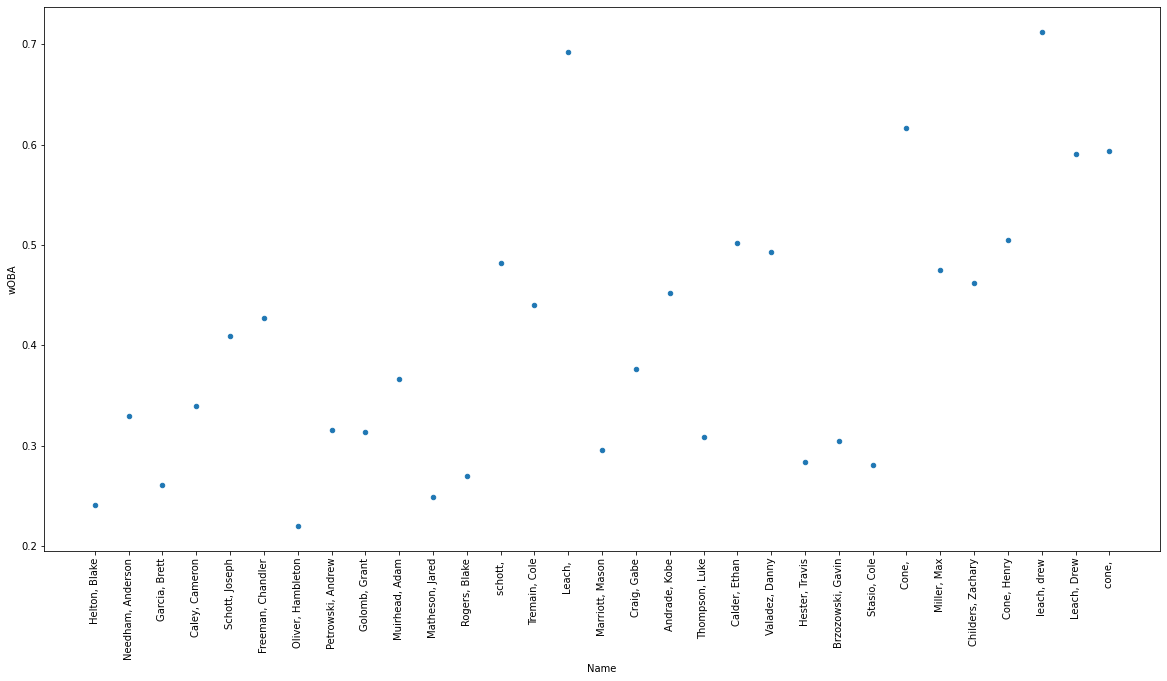

In [ ]:
graphWoba.plot.scatter(x = 'Name', y = 'wOBA', figsize = (20, 10))
plt.xticks(rotation = 90)
plt.show()